# K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ds = pd.read_csv("Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
ds.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [5]:
x = ds.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948833,
 44448.45544793371,
 37233.81451071001,
 30227.606513152015,
 25044.967764018926,
 21850.165282585633,
 19653.383606248826]

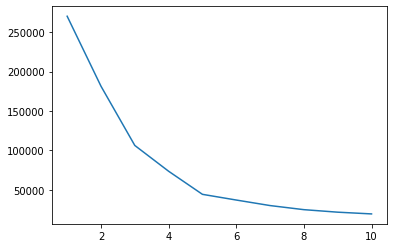

In [11]:
plt.plot(range(1,11), wcss)

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [15]:
y_kmean = kmeans.fit_predict(x)
y_kmean

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [16]:
ds["Cluster"] = y_kmean
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


In [25]:
counts = ds["Cluster"].value_counts()
counts

1    81
4    39
0    35
3    23
2    22
Name: Cluster, dtype: int64

<AxesSubplot:ylabel='Cluster'>

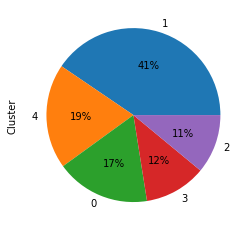

In [28]:
counts.plot.pie(autopct="%1.0f%%")

In [29]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [32]:
y_kmean == 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [33]:
x[y_kmean == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]])

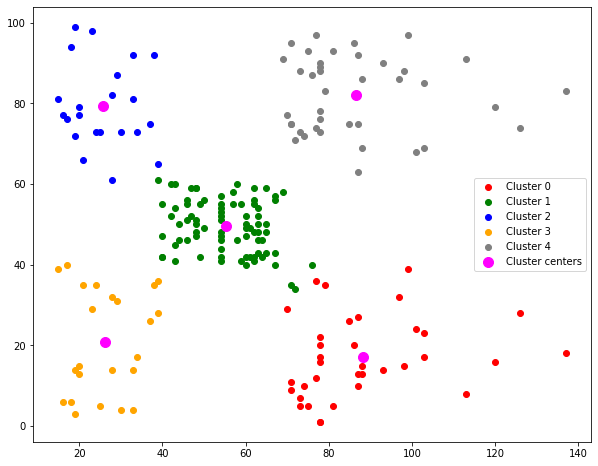

In [50]:
plt.figure(figsize=(10,8))
plt.scatter(x[y_kmean == 0, 0], x[y_kmean == 0,1], c='red', label="Cluster 0")
plt.scatter(x[y_kmean == 1, 0], x[y_kmean == 1,1], c='green', label="Cluster 1")
plt.scatter(x[y_kmean == 2, 0], x[y_kmean == 2,1], c='blue', label="Cluster 2")
plt.scatter(x[y_kmean == 3, 0], x[y_kmean == 3,1], c='orange', label="Cluster 3")
plt.scatter(x[y_kmean == 4, 0], x[y_kmean == 4,1], c='gray', label="Cluster 4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c="magenta", s=100, label="Cluster centers")
plt.legend()
plt.show()

In [41]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513]])